# Challenge: Promotions

In this challenge, you'll develop codes to parse and analyze data returned from another API on Zalando such as [Promos homme (Men's Promotions)
](https://www.zalando.fr/promo-homme/) or [Promos femme (Women's Promotions)](https://www.zalando.fr/promo-femme/). The workflow is almost the same as in the guided lesson but you'll work with different data.

## Obtaining the link

Wrote your codes in the cell below to obtain the data from the API endpoint you choose. A recap of the workflow:

1. Examine the webpages and choose one that you want to work with.

1. Use Google Chrome's DevTools to inspect the XHR network requests. Find out the API endpoint that serves data to the webpage.

1. Test the API endpoint in the browser to verify its data.

1. Change the page number offset of the API URL to test if it's working.

In [1]:
import requests
import pandas as pd 
import json
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
# your code here
url = "https://financialmodelingprep.com/api/v3/cryptocurrencies"
r = requests.get(url)
json = r.json()

        


{'ticker': 'BTC',
 'name': 'Bitcoin',
 'price': 10139.6,
 'changes': 0.83,
 'marketCapitalization': 181980000000}

In [3]:
from pandas.io.json import json_normalize

crypto = pd.DataFrame(json)
df = json_normalize(crypto["cryptocurrenciesList"])
btc_eth = df[(df["ticker"] == "BTC") | (df["ticker"] == "ETH")]
btc_eth_mp = btc_eth["marketCapitalization"].sum()
other_coins = df[(df["ticker"] != "BTC") & (df["ticker"] != "ETH")]
other_coins_mp = other_coins["marketCapitalization"].sum()
total = btc_eth_mp + other_coins_mp


Text(0.5, 0.98, 'Bitcoin&Ethereum vs Rest of Top 100')

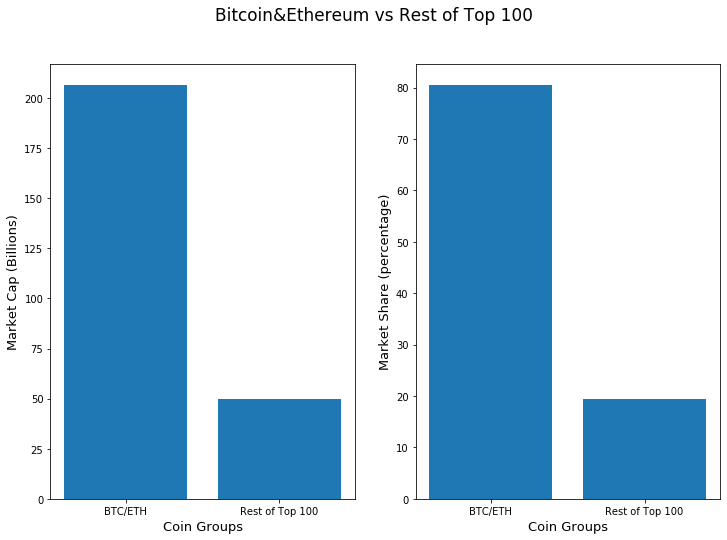

In [60]:
mp = pd.DataFrame(data = {
    
    "market_cap":[btc_eth_mp/1000000000,other_coins_mp/1000000000],
    "market_share": [((btc_eth_mp/total)*100),((other_coins_mp/total)*100)]}

    , index = ["BTC/ETH","Other_Coins"]
)


fig,ax = plt.subplots(1,2,figsize = [12,8])
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].bar(["BTC/ETH","Rest of Top 100"],mp["market_cap"])
ax[0].set_xlabel("Coin Groups", fontsize = 13)
ax[0].set_ylabel("Market Cap (Billions)", fontsize = 13)


ax[1].bar(["BTC/ETH","Rest of Top 100"],mp["market_share"])
ax[1].set_xlabel("Coin Groups", fontsize = 13)
ax[1].set_ylabel("Market Share (percentage)", fontsize = 13)

from pylab import *
gcf().suptitle("Bitcoin&Ethereum vs Rest of Top 100", fontsize =17)

In [61]:
#Bitcoin and Ethereum alone are worth much more than the rest of the coins in the top 100 combined

In [62]:
#Some people think that Bitcoin and Stock Market moves are highly correlated, specifically tech stocks. 
#https://www.telegraph.co.uk/investing/shares/bitcoin-not-gold-not-currency-tech-stock/
#lets compare their price action over time
#new api for bitcoin historical data
r = requests.get("https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100&api_key=6abd3dd092099356514259df83bebc6671c5351c1496c621cdbbc687c879659d")

In [77]:
btc = r.json()
btc = pd.DataFrame(btc)
btc = json_normalize(btc.iloc[3,5])
btc = btc.sort_values("time")

In [78]:
r =requests.get("https://financialmodelingprep.com/api/v3/historical-price-full/DIA?serietype=line")

# btc = json_normalize(btc.iloc[3,5])
# btc = btc.sort_values("time")

In [82]:
stocks = r.json()
stocks = pd.DataFrame(stocks)
stocks = json_normalize(stocks["historical"]).tail(100)


,date,close
1226,2019-04-29,264.7806
1227,2019-04-30,265.1298
1228,2019-05-01,263.4939
1229,2019-05-02,262.2270
1230,2019-05-03,264.3118
1231,2019-05-06,263.6136
1232,2019-05-07,258.8754
1233,2019-05-08,259.0150
1234,2019-05-09,257.7980
1235,2019-05-10,259.2744


## Reading the data

In the next cell, use Python to obtain data from the API endpoint you chose in the previous step. Workflow:

1. Import libraries.

1. Define the initial API endpoint URL.

1. Make request to obtain data of the 1st page. Flatten the data and store it in an empty object variable.

1. Find out the total page count in the 1st page data.

1. Use a FOR loop to make requests for the additional pages from 2 to page count. Append the data of each additional page to the flatterned data object.

1. Print and review the data you obtained.

In [ ]:
# your code here


## Bonus

Extract the following information from the data:

* The trending brand.

* The product(s) with the highest discount.

* The sum of discounts of all goods (sum_discounted_prices divided by sum_original_prices).

In [ ]:
# your code here